# Simulación Montecarlo
> El método de Montecarlo es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. El método se llamó así en referencia al Casino de Montecarlo (Mónaco) por ser “la capital del juego de azar”, al ser la ruleta un generador simple de números aleatorios. El nombre y el desarrollo sistemático de los métodos de Montecarlo datan aproximadamente de 1944 y se mejoraron enormemente con el desarrollo de la computadora.

Referencia:
- https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo

___
## 1. Introducción

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/54/Monte_carlo_method.svg" width="300px" height="100px" />

- Inventado por Stanislaw Ulam y a John von Neumann. Ulam ha explicado cómo se le ocurrió la idea mientras jugaba un solitario durante una enfermedad en 1946. 
- Advirtió que resulta mucho más simple tener una idea del resultado general del solitario haciendo pruebas múltiples con las cartas y contando las proporciones de los resultados que computar todas las posibilidades de combinación formalmente.
- Se le ocurrió que esta misma observación debía aplicarse a su trabajo de Los Álamos sobre difusión de neutrones, para la cual resulta prácticamente imposible solucionar las ecuaciones íntegro-diferenciales que gobiernan la dispersión, la absorción y la fisión.
- Dado que ya  empezaban a estar disponibles máquinas de computación para efectuar las pruebas numéricas, el método cobró  mucha fuerza.
- El método de Montecarlo proporciona soluciones aproximadas a una gran variedad de problemas matemáticos posibilitando la realización de experimentos con muestreos de números pseudoaleatorios en una computadora. El método es aplicable a cualquier tipo de problema, ya sea estocástico o determinista. 
- El método de Montecarlo tiene un error absoluto de la estimación que decrece como $\frac{1}{\sqrt{N}}$ en virtud del teorema del límite central.

### Ejemplo
Todos alguna vez hemos aplicado el método Montecarlo (inconscientemente). Como ejemplo, consideremos el juego de Astucia Naval.

Normalmente, primero se realizan una serie de tiros a puntos aleatorios. Una vez se impacta en un barco, se puede utilizar un algoritmo determinista para identificar la posición del barco y así terminar de derrumbarlo.



___
## 2. Caminata aleatoria
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/da/Random_Walk_example.svg" width="300px" height="100px" />

Una caminata aleatoria (*random walk* en inglés) es ua formalización matemática de la trayectoria que resulta al hacer pasos sucesivos aleatorios. Un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y en cada paso se mueve $+1$ o $-1$ con igual probabilidad.

Otros ejemplos:
- Trayectoria de una molécula al viajar en un fluido (líquido o gas).
- El camino que sigue un animal en su búsqueda de comida.
- El precio fluctuante de una acción.
- La situación de un apostador en un juego de azar.

Todos pueden ser aproximados por caminatas aleatorias, aunque no sean en verdad procesos aleatorios.

**Este también es un ejemplo de caminata aleatoria**

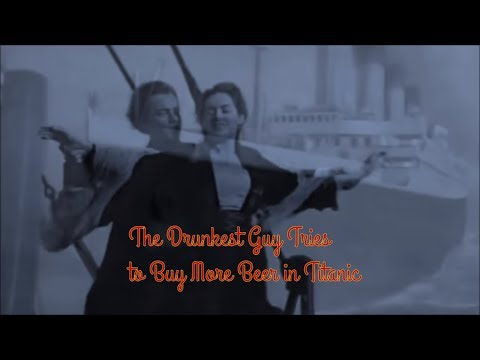

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y77WnkLbT2Q')

### Caminata aleatoria en una dimensión
Como dijimos, un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y a cada paso se mueve , which starts at 0 and at each step moves $+1$ o $-1$ con igual probabilidad.

Esta caminata se puede ilustrar como sigue:
- Se posiciona en $0$ en la línea de números enteros y una moneda justa se tira.
- Si cae en **sol** nos moveremos una unidad a la derecha.
- Si cae en **águila** nos moveremos una unidad a la izquierda.

Notemos que después de $5$ pasos podremos estar en 1, −1, 3, −3, 5, or −5. Las posibilidades son las siguientes:

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/05/Flips.svg" width="900px" height="300px" />


Referencia:
- https://en.wikipedia.org/wiki/Random_walk

**Importante:** librería random.

Referencia:
- https://docs.python.org/3/library/random.html

In [1]:
import random

In [2]:
def caminata_aleatoria(N):
    s = 0
    ss = [s]
    for i in range(N):
        z = random.choice([-1,1])
        s += z
        ss.append(s)
    return ss, s

**Actividad.** Graficar, en una misma ventana de gráficos, al menos ocho caminatas aleatorias de 100 pasos.

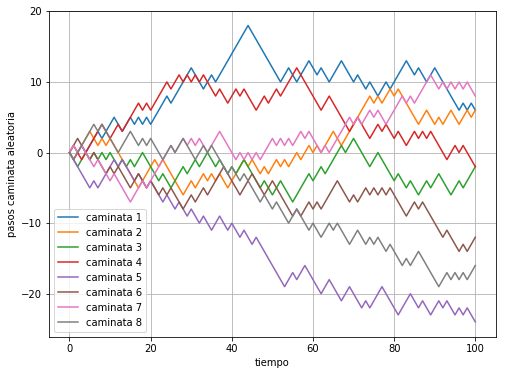

In [3]:
# Solucionar acá
# Importamos libreria para graficar
import matplotlib.pyplot as plt
%matplotlib inline
N = 100
tiempo = range(N+1)
plt.figure(figsize=(8,6))
for i in range(8):
    # Generemos la caminata aleatoria de 100 pasos
    ss, s = caminata_aleatoria(N)
    # Graficamos
    plt.plot(tiempo, ss, label = 'caminata %i'%(i+1))
plt.xlabel('tiempo')
plt.ylabel('pasos caminata aleatoria')
plt.legend(loc='best')
plt.grid()
plt.show()

### Por lo que puedo ver este ejemplo demuestra posibles variaciones en un determinado ejercicio con un número relativamente reducido de opciones y sucesos.

### Usamos montecarlo para evaluar el resultado de la caminata aleatoria

- Describir, de nuevo, el proceso de la caminata aleatoria en el pizarrón y ver el valor esperado de la caminata después de N pasos.

- Luego, evaluar el proceso utilizando montecarlo y comparar resultados.

In [4]:
import numpy as np
N = 100
n = 100000
ultimo = []
for i in range(n):
    ss, s = caminata_aleatoria(N)
    ultimo.append(s)
    #plt.plot(ss)

#plt.show()
print("La media muestral del ultimo valor de la caminata aleatoria es:", np.mean(ultimo))

La media muestral del ultimo valor de la caminata aleatoria es: 0.01876


### Esto es meramente la expresión de los resultados, nada fuera de lo esperado.

## Ejemplo

Ahora, para comprender el alcance de la simulación Montecarlo, tomaremos el ejemplo de un apostador básico.

Referencia:
- https://pythonprogramming.net/monte-carlo-simulator-python/

Supongamos que estamos en un casino especial, donde el usuario puede tirar un *dado metafórico* que puede dar como resultado del número uno (1) al número cien (100).

Si el usuario tira cualquier número entre 1 y 50, el casino gana. Si el usuario tira cualquier número entre 51 y 99, el usuario gana. Si el usuario tira 100, pierde.

Con esto, el casino mantiene un margen del 1%, el cual es mucho más pequeño que el margen típico en casinos, al igual que el margen de mercado cuando se incorporan costos por transacción.

Por ejemplo, [Scottrade](https://www.scottrade.com/) cobra \$7 USD por transacción. Si se invierten \$1000 USD por acción, esto significa que tienes que pagar \$7 USD para entrar, y \$7 USD para salir, para un total de \$14 USD.

Esto pone el margen en 1.4\%. Esto significa, que a largo plazo, las ganancias tienen que ser mayores a 1.4\% en promedio, de otra manera se estará perdiendo dinero. Aunque este porcentaje es pequeño, las probabilidades ya están en contra. La comercialización de acciones es un juego 50/50, especialmente en el corto plazo.

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 el usuario gana. Un 100 significa que la casa gana.

Ahora, comencemos. Primero tenemos que crear nuestro dado.

In [5]:
# Explorar función randint de la librería random y crear una función que simule la tirada de un dado
def tirar_dado():
    return random.randint(1, 100)

In [6]:
# Tirar el dado 100 veces para comprobar que nuestra función si trabaja correctamente
N = 100
for i in range(N):
    print("resultado:", tirar_dado())

resultado: 58
resultado: 48
resultado: 6
resultado: 60
resultado: 86
resultado: 98
resultado: 5
resultado: 55
resultado: 70
resultado: 29
resultado: 56
resultado: 17
resultado: 38
resultado: 16
resultado: 64
resultado: 25
resultado: 33
resultado: 29
resultado: 73
resultado: 27
resultado: 93
resultado: 32
resultado: 36
resultado: 8
resultado: 6
resultado: 20
resultado: 51
resultado: 8
resultado: 84
resultado: 86
resultado: 71
resultado: 19
resultado: 68
resultado: 85
resultado: 26
resultado: 55
resultado: 41
resultado: 1
resultado: 88
resultado: 6
resultado: 78
resultado: 25
resultado: 71
resultado: 85
resultado: 55
resultado: 9
resultado: 43
resultado: 77
resultado: 45
resultado: 60
resultado: 38
resultado: 86
resultado: 85
resultado: 84
resultado: 13
resultado: 74
resultado: 85
resultado: 25
resultado: 99
resultado: 48
resultado: 7
resultado: 36
resultado: 49
resultado: 18
resultado: 9
resultado: 22
resultado: 73
resultado: 39
resultado: 20
resultado: 59
resultado: 3
resultado: 5
resu

Sin embargo, el dado por si solo no nos es útil. Necesitamos una función que nos devuelva sólamente si ganamos o perdemos.

### Aquí estamos creando un escenario "real" en base a unas suposiciones y tres parámetros de delimitación. En teoría nos debería de dar el resultado de ganancia del casino por una cantidad mínima. En realidad podemos ver que no necesariamente. Esto también basado en ser una muestra relativamente pequeña de resultados.

In [7]:
# Cambiar/usar la anterior función para obtener una que devuelva simplemente ganar(true) o perder(false)
def tirar_dado():
    x = random.randint(1, 100)
    if x <= 50:
        return False
    elif 51<= x< 100:
        return True
    elif x == 100:
        return False

In [53]:
# Probar la función creada para ver que funcione
N = 100
contador_ganar = 0
contador_perder = 0
for i in range(N):
    if tirar_dado():
        print("Felicidades!")
        contador_ganar += 1
    else:
        print("Sigue intentando")
        contador_perder += 1

print("Ganamos", contador_ganar, " veces y perdimos", contador_perder, " veces.")

Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigu

Ahora, necesitamos crear un apostador. Empezaremos con uno extremadamente básico por ahora. Veremos, que aún con un apostador muy básico, veremos cosas muy reveladoras usando un simulador montecarlo.

### Lo mismo que el de antes realmente, solo que ahora la consola te dice si el número que aparece es uno ganador o perdedor.

In [14]:
# Crearemos un apostador simple. Las caracterísitcas son: se empieza con un capital inicial, siempre se apuesta lo mismo,
# y se va a apostar un número determinado de veces.
def apostador(cap_inicial, apuesta, n_apuestas):
    capital = cap_inicial
    ccapital = [cap_inicial]
    
    for i in range(n_apuestas):
        if tirar_dado():
            capital += apuesta
            ccapital.append(capital)
        else:
            capital -= apuesta
            ccapital.append(capital)
    
    return ccapital

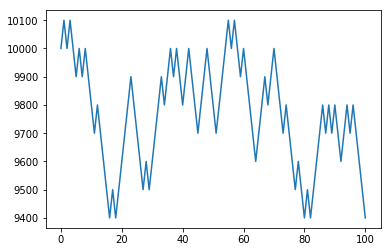

In [15]:
# Ver como evolucionan los fondos de nuestro apostador al jugar 100 veces
plt.plot(apostador(10000, 100, 100))
plt.show()

En realidad no nos importa tanto como evolucionan estos fondos. Nos importa más cuáles son los fondos al final (al largo plazo). Modificar la función anterior para ver esto.

In [16]:
# Función de apostador que devuelve los fondos al final de apostar una cantidad determinadad de veces
def apostador(cap_inicial, apuesta, n_apuestas):
    capital = cap_inicial
    #ccapital = [cap_inicial]
    
    for i in range(n_apuestas):
        if tirar_dado():
            capital += apuesta
            #ccapital.append(capital)
        else:
            capital -= apuesta
            #ccapital.append(capital)
        
        if capital<=0:
            capital = "Banca rota"
            return capital
    
    return capital

In [11]:
# (Montecarlo) Simular varios (100) escenarios en que se apuestan 50, 100, 1000 y 10000 veces. ¿Qué pasa?
N = 100
n = 10000
for i in range(N):
    print("Capital al final:", apostador(10000, 100, n))

Capital al final: 4400
Capital al final: 5800
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: 1800
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: 3200
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: 4400
Capital al final: Banca rota
Capital al final: 3800
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: 2400
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: Banca rota
Capital al final: 1400
Capital al final: Banca rota
Capi

Vemos que al largo plazo la mayoría de los apostadores quebraron. Sin embargo, esta forma de visualizar los resultados no es adecuada. Utilicemos matplotlib.

In [17]:
# Modificar la función para que no devuelva los fondos al final, sino que grafique los fondos a través del tiempo
def apostador(cap_inicial, apuesta, n_apuestas):
    capital = cap_inicial
    ccapital = [cap_inicial]
    
    for i in range(n_apuestas):
        if tirar_dado():
            capital += apuesta
            ccapital.append(capital)
        else:
            capital -= apuesta
            ccapital.append(capital)
    
    return ccapital

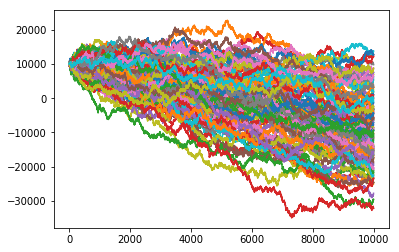

In [18]:
# (Montecarlo) Simular varios (100) escenarios en que se apuestan 50, 100, 1000 y 10000 veces. ¿Qué pasa?
N = 100
n = 10000
for i in range(N):
    plt.plot(apostador(10000, 100, n))
    
plt.show()

### Finalmene se nos muestran casos de apostadores, en ellos conseguimos los resultados obvios y esperados sin embargo su visualización es pobre inicialmente. Es por esto que se nos da una diferente al finaol de los resultados a través de la gráfica.

Por esto los apostadores pierden. Normalmente las probabilidades no están evidentemente muy en contra de ellos, solo un poco. Los casinos únicamente entienden psicología básica: ganar es extremadamente adictivo. Por ello, los casino se construyen para mantenerte jugando.

En el corto plazo, la mayoría de los jugadores no se dan cuenta que son más propensos a perder. Las veces que ganan y pierden son muy parejas. Estadísticamente, casi la mitad de las personas terminarán con ganancias después de jugar unas pocas veces. El problema es la adicción, y que ellos continuarán apostando, y por ende perdiendo sus ganancias. Es matemática extremadamente básica, pero la psicología humana es débil.

In [19]:
#En este caso inicialmente era para ver la cantidad de veces de exito de un dado.
#Creí interesante ver que pasaría si lo cambiamos a la cambiamos a una cantidad mucho mayor de opciones.
#Supondría que los resultados serían similares y meramente reproducidos a gran escala.
def tirar_dado():
    x = random.randint(1, 100000)
    if x <= 50000:
        return False
    elif 50001<= x< 100000:
        return True
    elif x == 100000:
        return False

In [20]:
# Probar la función creada para ver que funcione
N = 100000
contador_ganar = 0
contador_perder = 0
for i in range(N):
    if tirar_dado():
        print("Felicidades!")
        contador_ganar += 1
    else:
        print("Sigue intentando")
        contador_perder += 1

print("Ganamos", contador_ganar, " veces y perdimos", contador_perder, " veces.")

Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue int

Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue inten

Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!


Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue inten

Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicid

Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando


Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
S

Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felic

Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades

Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Si

Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigu

Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
S

Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
S

Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicida

Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentand

Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
S

Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue inte

Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
F

Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigu

Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades

Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue inten

Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Fel

Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidade

Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Fe

Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue 

Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Fe

Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicid

Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sig

Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
S

Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidade

Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue

Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades

Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidad

Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentand

Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!


Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Feli

Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Fel

Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felici

Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue inte

Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Fe

Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Fe

Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Sigue int

Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felici

Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Feli

Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentan

Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue intentando
Felicidades!
Sigue intentando
Sigue intentando
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Felicidades!
Felicidades!
Sigue intentando
Felicidades!
Felicidades!
Sigue intentando
Sigue in

### En cierta manera este método nos permite medir cualquier cosa.Específicamente las posibilidades de éxito o de que tan esperado llega a ser un resultado entre varios. Sin duda haría que cualquier apostador se replanteara como gasta su dinero y tiempo. También parece ser sumamente útil para materias económicas.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>